In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=[10,8]
pd.set_option('display.max_columns',50)

In [8]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train.shape,test.shape

((891, 12), (418, 11))

###Roadmap

* Univariate Analysis
* Bivariate Analysis - Here we try to find the pattern with the TGT.
* Missing Values
* Outliers Identification
* Feature Engineering.
* Scaling/transformation

**Model Building**
* Base Model - You must have your base model.In Classification, the base model is the 0s and in Regression,its average.

* Logistic Regression Model followed by Tree Based Models

Note- All the model are submitted using KFold Cross Validation Approach.

* Paramter Tunning Should be done for top 3 models only.Once that is done we will build the stacking model(Ensemble model).

Exceptions: LightGBM,Catboost,ExTreesClassifier......
(This model are based on Categorical Data)




In [14]:
#Univariate Analysis

combined = pd.concat([train,test],ignore_index=True)

num_cols=combined.select_dtypes(include=np.number)

In [16]:
num_cols.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

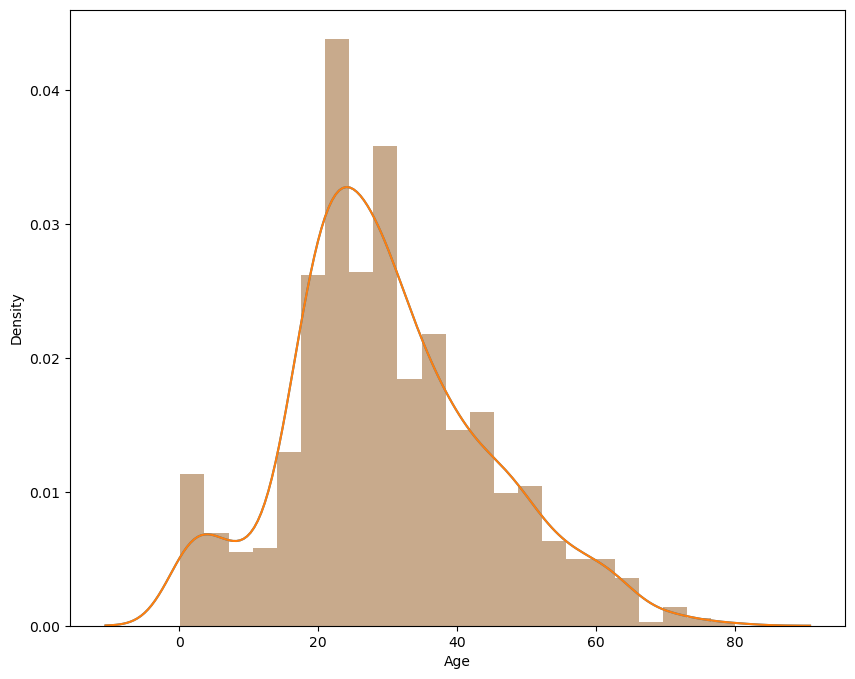

In [20]:
#dist plot for age

sns.distplot(combined.Age)
plt.show()

#Age is skewed meanings that there were lot of people are above 30

In [21]:
combined.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

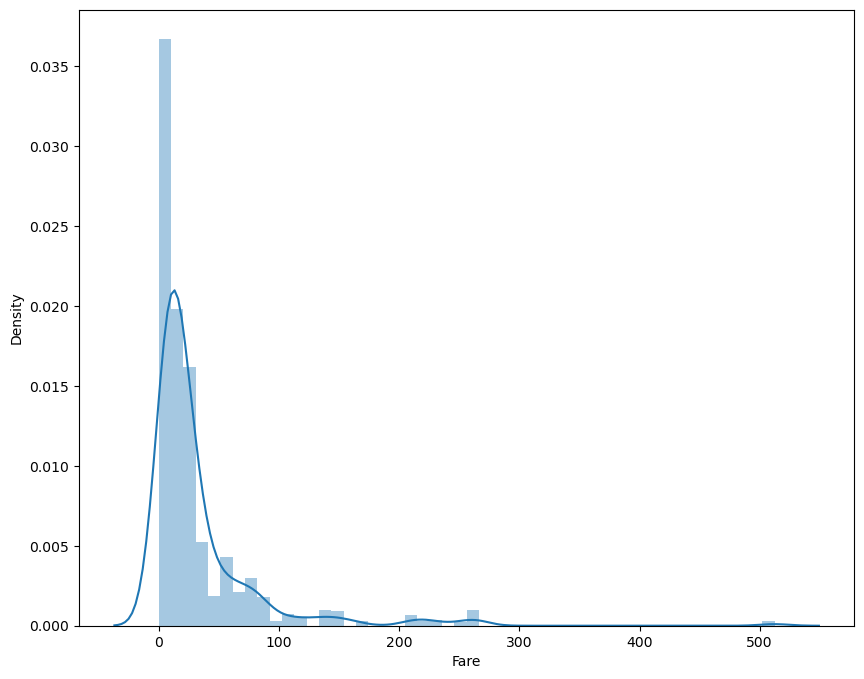

In [28]:
#pplot for fare

sns.distplot(combined.Fare)
plt.show()

#Fare is Highly Skewed

In [29]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


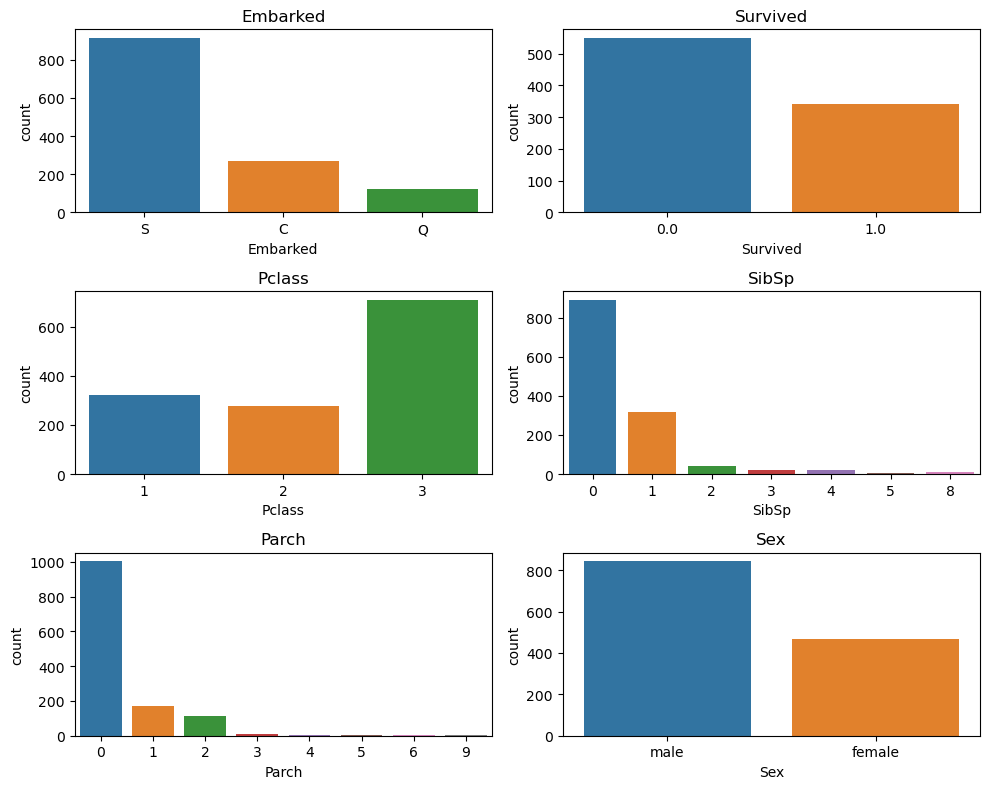

In [32]:
cols=['Embarked','Survived','Pclass','SibSp','Parch','Sex']

c=1
for i in cols:
    plt.subplot(3,2,c)
    
    sns.countplot(combined[i])
    plt.title(i)
    c+=1
plt.tight_layout()
plt.show()


# Most of people embarked from southampton,mostly males,
# were class 3 passengers
# and travelled alone did not survive.

In [33]:
# Base Model- All Died


In [45]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':0})

In [46]:
cd

C:\Users\hp


In [50]:
submission.to_csv('basemodel1.csv',index=False)

In [48]:
# All females Survied

my_dict= {'male':0,'female':1}

In [51]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':test.Sex.map(my_dict)})

In [53]:
submission.to_csv('AllFemales1.csv',index=False)

# Bivariate Analysis
* num vs cat

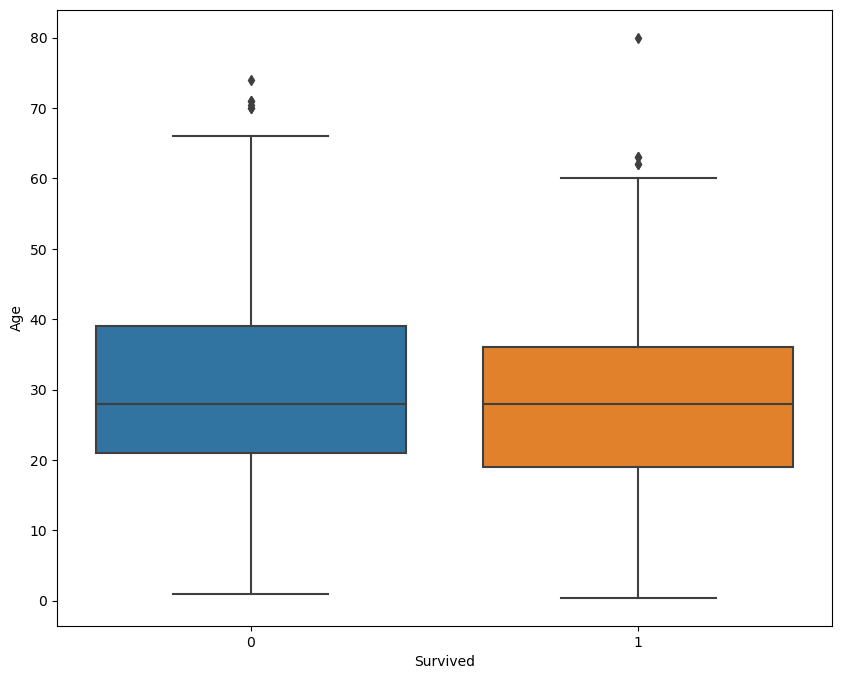

In [55]:
#Age vs Survived
sns.boxplot(x='Survived',y='Age',data=train)
plt.show()

#Outlier- A man with 80 years of Age survived

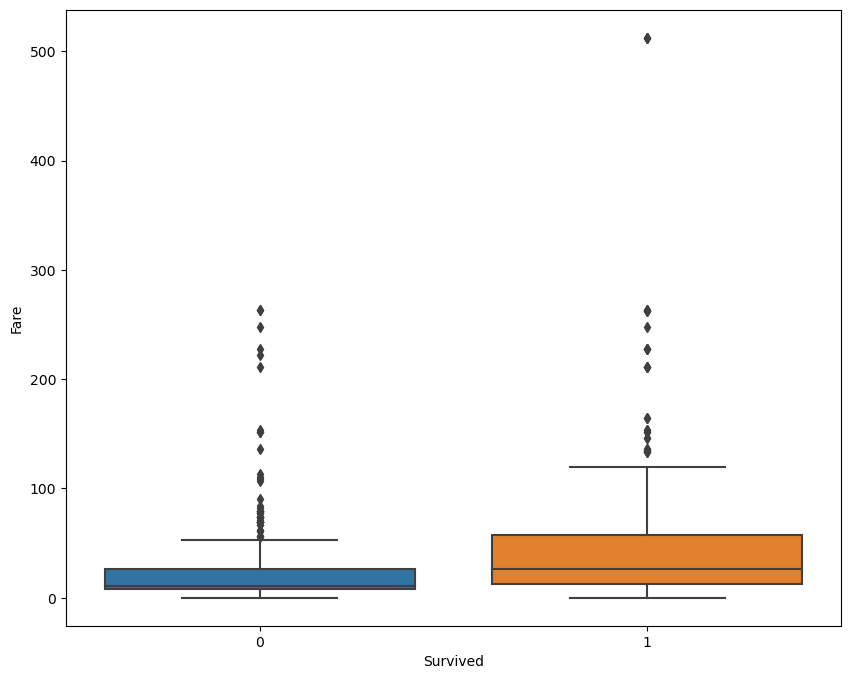

In [58]:
#Fare vs Survived
sns.boxplot(x='Survived',y='Fare',data=train)
plt.show()

#people who survived paid more fare most likely

In [59]:
#Statistically Summary
train.groupby('Survived')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


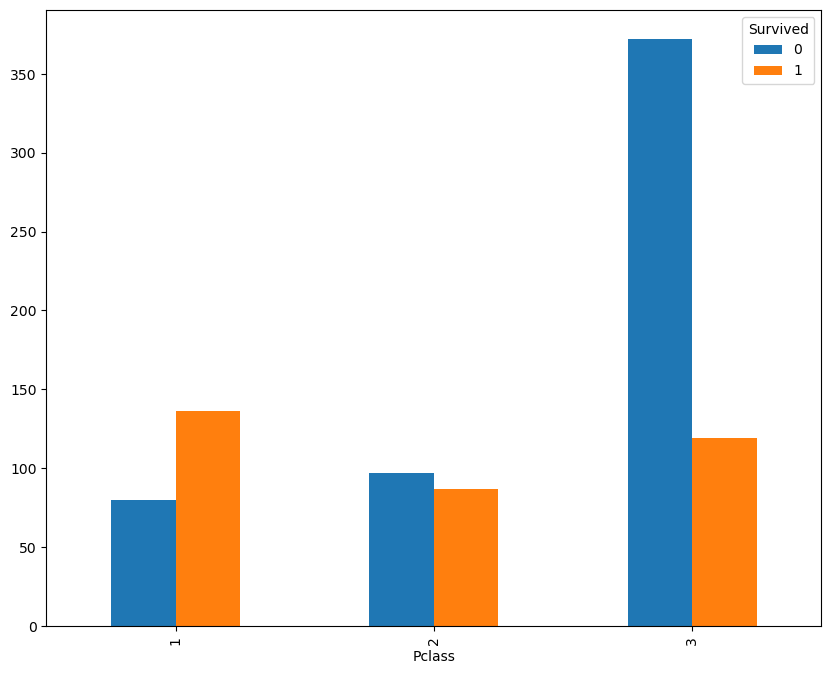

In [65]:
#Pclass vs Survived

pd.crosstab(train['Pclass'],train['Survived']).plot(kind='bar')
plt.show()

#inf: Class1 and 2 have a higher survival rate in comp to class 3

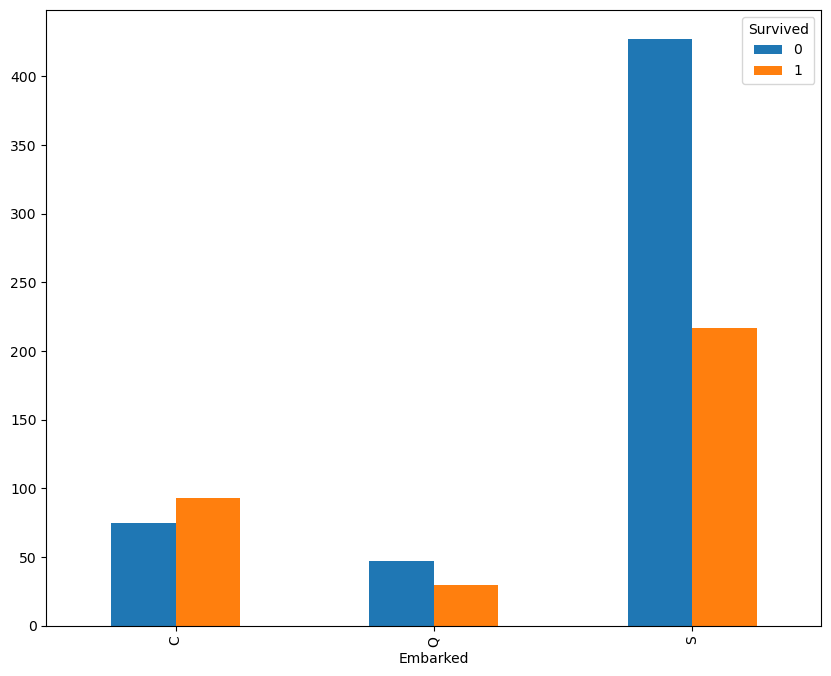

In [67]:
#embarked vs Survived

pd.crosstab(train['Embarked'],train['Survived']).plot(kind='bar')
plt.show()

#inf:Cherbug and then Southampton people have a higher Survival Percentage.

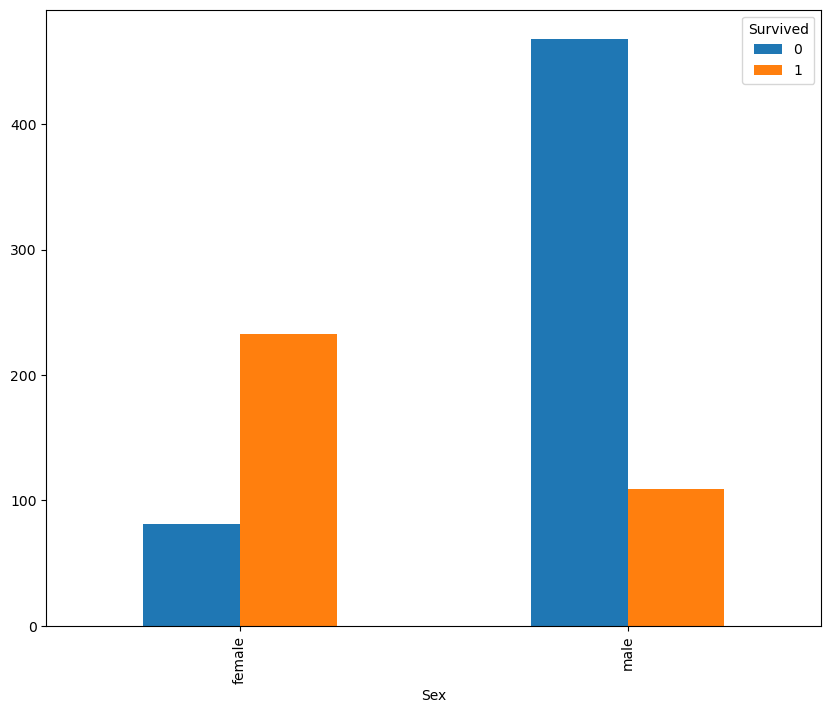

In [68]:
#Sex vs Survived

pd.crosstab(train['Sex'],train['Survived']).plot(kind='bar')
plt.show()

#inf: High Survival of Females in Camparison to males......

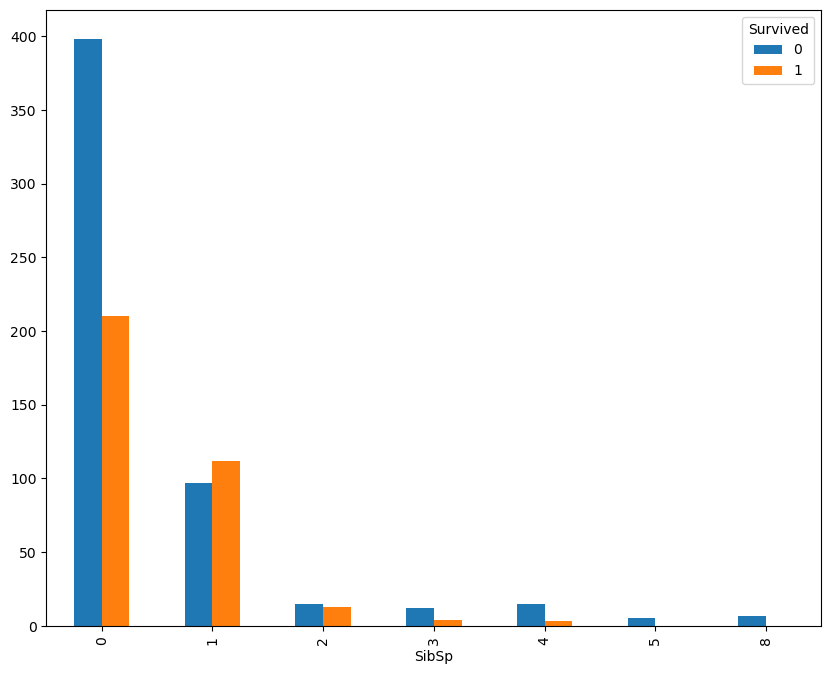

In [70]:
#SibSb vs Survived

pd.crosstab(train['SibSp'],train['Survived']).plot(kind='bar')
plt.show()


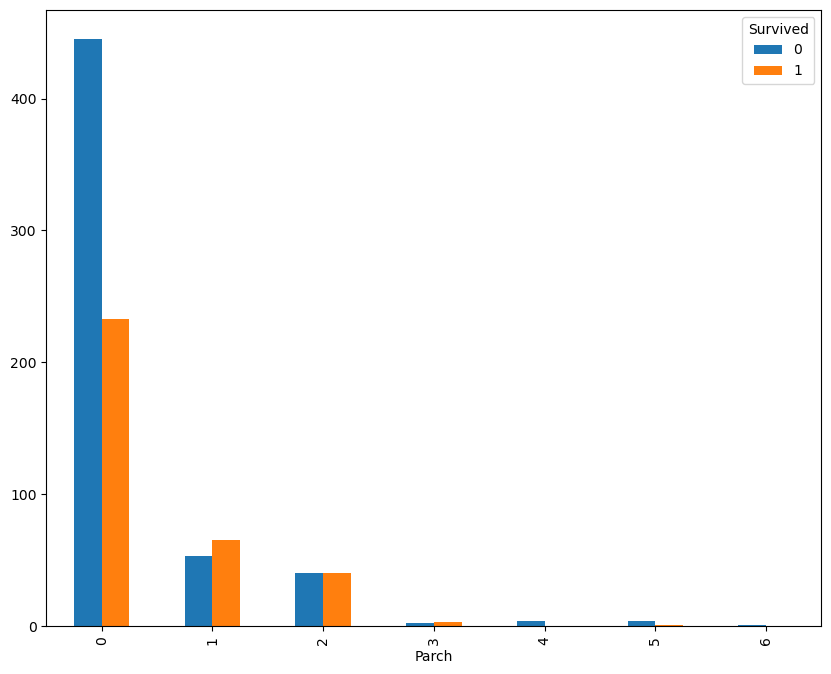

In [73]:
#Parch vs Survived

pd.crosstab(train['Parch'],train['Survived']).plot(kind='bar')
plt.show()

#inf: Smaller families had a high likehood of survived

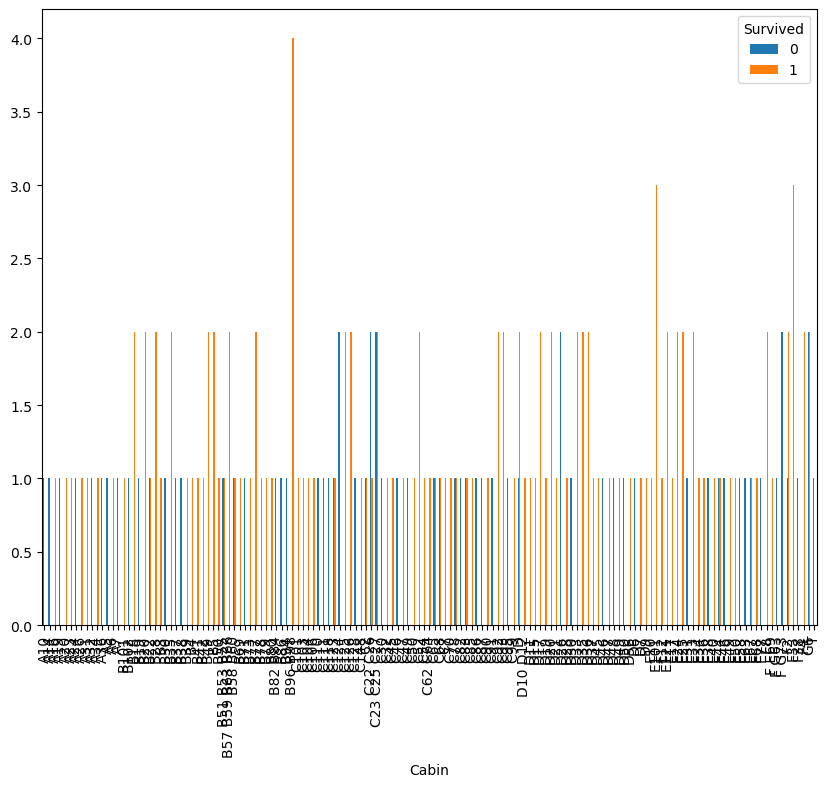

In [75]:
#cabin vs Survived

pd.crosstab(train['Cabin'],train['Survived']).plot(kind='bar')
plt.show()

people with class 1 comming from Cherbourg/Southampton,paid fare more than 26 dollars,female,travelling solo with 1 persons/kid(s)with age of 30 or more has a high likelihood of survival.

In [77]:
#Missing values
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

### Feature Enegineering
* cabin

In [78]:
combined.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [79]:
cabins=['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
       'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
       'C148', 'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28',
       'C51', 'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80',
       'C89', 'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D40', 'D38', 'C105']

In [81]:
def cabin_available(x):
    if x in cabins:
        return('Aval')
    else:
        return('Miss')

In [83]:
combined['Cabin_Cat']=combined.Cabin.apply(cabin_available)

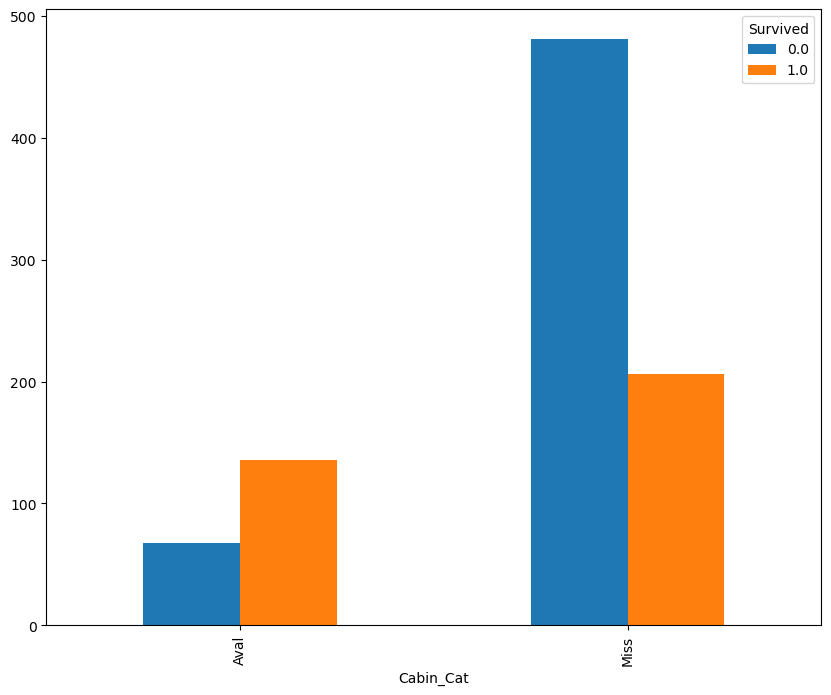

In [87]:
pd.crosstab(combined.Cabin_Cat,combined.Survived).plot(kind='bar')
plt.show()

In [88]:
#Age vs 

In [96]:
#name - extract the salutation

f_names=combined.Name.str.split(',',expand=True)[1]

In [98]:
#try using lambda Homework

In [105]:
combined['titles']=f_names.str.split('.',expand=True)[0]

In [106]:
combined.titles.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [158]:
titles_ignore=[ ' Don', ' Rev', ' Dr', ' Mme',
        ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona']

def mytitles(x):
    if x in titles_ignore:
        return('Others')
    else:
        return(x)

In [159]:
combined['titles']=combined.titles.apply(mytitles)

In [161]:
combined.titles.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', 'Others', ' Ms'], dtype=object)

In [168]:
combined.groupby('titles')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
titles,,,,,,,,
Master,61.0,5.288197,3.906924,0.33,2.00,4.0,8.00,14.5
Miss,260.0,21.817654,11.003754,0.17,17.00,22.0,27.00,63.0
Mr,757.0,31.496037,10.966971,11.00,25.00,29.0,35.00,80.0
Mrs,197.0,36.789340,11.991282,14.00,28.00,35.5,45.00,76.0
Ms,2.0,28.000000,0.000000,28.00,28.00,28.0,28.00,28.0
Others,32.0,43.187500,12.113542,23.00,32.75,45.0,52.25,70.0


In [164]:
#Replacing all missing values with mean and median based on salutation

In [166]:
combined.loc[(combined.titles==' Master') & (combined.Age.isnull()),'Age']=4
combined.loc[(combined.titles==' Miss') & (combined.Age.isnull()),'Age']=22
combined.loc[(combined.titles==' Mr') & (combined.Age.isnull()),'Age']=29
combined.loc[(combined.titles==' Mrs') & (combined.Age.isnull()),'Age']=35.5
combined.loc[(combined.titles==' Ms') & (combined.Age.isnull()),'Age']=28
combined.loc[(combined.titles=='Others') & (combined.Age.isnull()),'Age']=45

In [169]:
combined.Age.isnull().sum()

0

In [177]:
combined[combined.Ticket=='3701']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Cat,titles
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.89,NaN,S,Miss,Mr


In [175]:
#Fare

#Titles=Mr,PClass=3, and cabin Not Alloted

combined.loc[(combined.titles==' Mr') & 
             (combined.Cabin_Cat=='Miss') & 
             (combined.Pclass==3),'Fare'].describe()

count    439.000000
mean      11.167623
std       10.074809
min        0.000000
25%        7.750000
50%        7.895800
75%        8.662500
max       69.550000
Name: Fare, dtype: float64

In [176]:
#Fare as 7.89

combined.loc[combined.Fare.isnull(),'Fare']=7.89

In [185]:
combined.loc[combined.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Cat,titles
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Aval,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Aval,Mrs


In [186]:
combined.loc[combined.Cabin=='B28','Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

In [188]:
combined.loc[(combined.Fare>=80) & (combined.Pclass==1),'Embarked'].mode()

0    C
Name: Embarked, dtype: object

In [191]:
combined.loc[combined.Embarked.isnull(),'Embarked']='C'

In [195]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Cabin       1014
dtype: int64

In [197]:
combined.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Cat,titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Miss,Mr


In [201]:
#Family
combined['Family']=combined.SibSp+combined.Parch+1

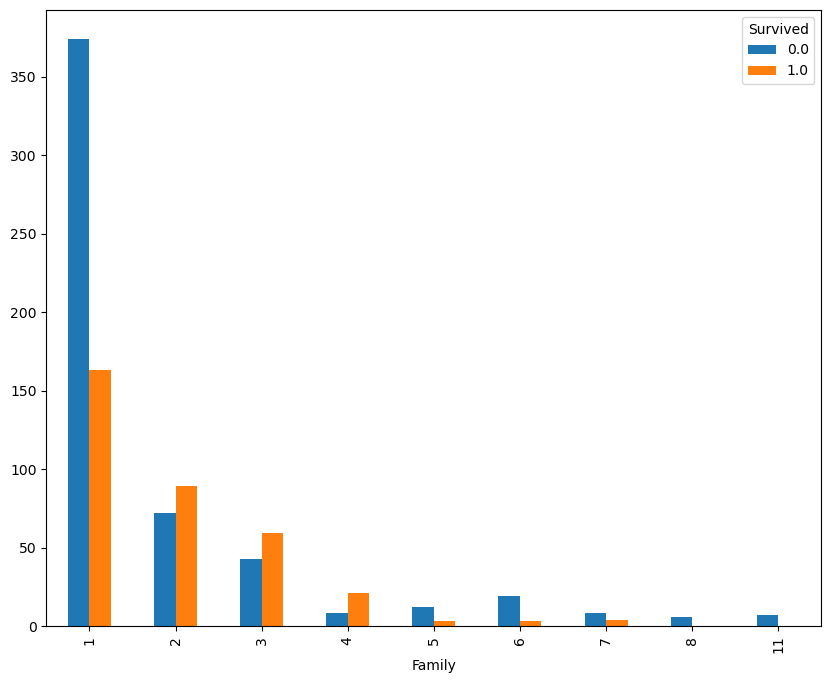

In [206]:
pd.crosstab(combined.Family,combined.Survived).plot(kind='bar')
plt.show()

In [209]:
#family_cat
def fam(x):
    if (x==1):
        return('Solo')
    elif(x==2):
        return('Couples')
    elif(x==3):
        return('Small_Family')
    else:
        return('Large_Family')
combined['Family_Cat']=combined.Family.apply(fam)

In [212]:
combined.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Cat,titles,Family,Family_Cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Miss,Mr,2,Couples


In [220]:
combined[combined.Fare==0].count()

PassengerId    17
Survived       15
Pclass         17
Name           17
Sex            17
Age            17
SibSp          17
Parch          17
Ticket         17
Fare           17
Cabin           4
Embarked       17
Cabin_Cat      17
titles         17
Family         17
Family_Cat     17
dtype: int64

In [221]:
combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Cat', 'titles',
       'Family', 'Family_Cat'],
      dtype='object')

In [223]:
new = combined.drop(['Cabin','PassengerId','SibSp','Parch','Ticket','Name'],axis=1)

In [226]:
#split the dataset into train test

In [229]:
train.shape,test.shape

((891, 12), (418, 11))

In [235]:
newtrain=new.iloc[0:train.shape[0],]
newtrain.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_Cat,titles,Family,Family_Cat
0,0.0,3,male,22.0,7.2500,S,Miss,Mr,2,Couples
1,1.0,1,female,38.0,71.2833,C,Aval,Mrs,2,Couples
2,1.0,3,female,26.0,7.9250,S,Miss,Miss,1,Solo
3,1.0,1,female,35.0,53.1000,S,Aval,Mrs,2,Couples
4,0.0,3,male,35.0,8.0500,S,Miss,Mr,1,Solo


In [236]:
#Train set
newtrain.shape

(891, 10)

In [242]:
#test set
newtest=new.iloc[train.shape[0]:, ]

In [243]:
newtrain.shape,newtest.shape

((891, 10), (418, 10))

In [245]:
newtest.drop('Survived',axis=1,inplace=True)

In [247]:
newtrain.shape,newtest.shape

((891, 10), (418, 9))

### Statistical test

In [252]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int32  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   Cabin_Cat   891 non-null    object 
 7   titles      891 non-null    object 
 8   Family      891 non-null    int64  
 9   Family_Cat  891 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 66.3+ KB


In [249]:
newtrain.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_Cat,titles,Family,Family_Cat
0,0.0,3,male,22.0,7.25,S,Miss,Mr,2,Couples


In [251]:
#chii-squarre test

#Ho: That the Predictor is independent of TGT

#In other words, predictor and tgt are not related

#Ha: Ho is false

cols=['Embarked','Pclass','Sex','Cabin_Cat','titles','Family','Family_Cat']
newtrain['Survived']=newtrain.Survived.astype(int)

In [256]:
import scipy.stats as stats

for i in cols:
    tbi=pd.crosstab(newtrain.loc[:, i],newtrain.Survived)
    teststas,pvalue,df,exp_freq = stats.chi2_contingency(tbi)
    print('Pvalue for',i,'is',np.round(pvalue,5))

Pvalue for Embarked is 0.0
Pvalue for Pclass is 0.0
Pvalue for Sex is 0.0
Pvalue for Cabin_Cat is 0.0
Pvalue for titles is 0.0
Pvalue for Family is 0.0
Pvalue for Family_Cat is 0.0


In [258]:
#two sample ind_ttest

In [259]:
cols=['Age','Fare']

for i in cols:
    zero=newtrain.loc[newtrain.Survived==0,i]
    one=newtrain.loc[newtrain.Survived==1,i]
    
    teststats,pvalue=stats.ttest_ind(zero,one)
    print(pvalue)

0.03349912645306346
6.120189341924198e-15


# Model Building

* Logistic Regression
* Random Forest Model
* XGboost
* Lightgbm

In [272]:
X=newtrain.drop('Survived',axis=1)
y=newtrain.Survived

In [273]:
X=pd.get_dummies(X,drop_first=True)
newtest=pd.get_dummies(newtest,drop_first=True)

In [274]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

#from lightgbm import LGMClassifier

In [279]:
X.shape,newtest.shape

((891, 16), (418, 16))

In [280]:
#initiate the machine for Learnings

kfold=StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=0)

lg=LogisticRegression()

pred=[]

for train_index,test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(lg.fit(xtrain,ytrain).predict(newtest))
    

In [284]:
finalpred=pd.DataFrame(pred).T.mode(axis=1)

In [285]:
finalpred

,0
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [287]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})

In [289]:
submission.to_csv('lg.csv',index=False)     #76.315

# Random Forest

In [290]:
rf=RandomForestClassifier()

pred=[]

for train_index,test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(newtest))

In [294]:
finalpred=pd.DataFrame(pred).T.mode(axis=1)
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})
submission.to_csv('rf.csv',index=False)   #74.4

# Gradient Boosting

In [296]:
gb=GradientBoostingClassifier()

pred=[]

for train_index,test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(gb.fit(xtrain,ytrain).predict(newtest))

In [297]:
finalpred=pd.DataFrame(pred).T.mode(axis=1)
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})
submission.to_csv('gb.csv',index=False)   #77.72

# Ada Boosting

In [299]:
from sklearn.ensemble import AdaBoostClassifier

In [301]:
ad=AdaBoostClassifier()
pred=[]

for train_index,test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(ad.fit(xtrain,ytrain).predict(newtest))

In [302]:
finalpred=pd.DataFrame(pred).T.mode(axis=1)
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})
submission.to_csv('ad.csv',index=False)   #76.315

# LG_20

In [303]:
#initiate the machine for Learnings

kfold=StratifiedKFold(n_splits=20,
                      shuffle=True,
                      random_state=0)

lg=LogisticRegression()

pred=[]

for train_index,test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(lg.fit(xtrain,ytrain).predict(newtest))
    

In [305]:
finalpred=pd.DataFrame(pred).T.mode(axis=1)
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})
submission.to_csv('lg_20.csv',index=False)  

# LightGBM

In [313]:
from lightgbm import LGBMClassifier

In [310]:
lgm=LGBMClassifier()

pred=[]

for train_index,test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(lgm.fit(xtrain,ytrain).predict(newtest))

In [311]:
finalpred=pd.DataFrame(pred).T.mode(axis=1)
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})
submission.to_csv('lgm.csv',index=False)   #74.8

In [316]:
from xgboost import XGBClassifier

In [318]:
xgb=XGBClassifier()

pred=[]

for train_index,test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(xgb.fit(xtrain,ytrain).predict(newtest))

In [319]:
finalpred=pd.DataFrame(pred).T.mode(axis=1)
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})
submission.to_csv('ExtremeGradientBoosting.csv',index=False)    #74.8

# Parameter Tuning of GBM

In [320]:
from sklearn.model_selection import GridSearchCV

In [324]:
params=[{'loss':['log_loss','deviance', 'exponential'],
        'n_estimators':[100,200,500,1000],
        'max_depth':[2,4,5,6],
        'min_samples_split':[2,4,6,8],
        'criterion':['friedman_mse','squared_error']}]

gbm=GradientBoostingClassifier()

grid=GridSearchCV(gbm,param_grid=params,cv=5)
grid.fit(X,y)
grid.best_params_

{'criterion': 'friedman_mse',
 'loss': 'log_loss',
 'max_depth': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

 **Stacking Classifier Model**

In [328]:
from sklearn.ensemble import StackingClassifier

basemodels=[('lg',lg),('lgm',lgm)]
finalmodel=GradientBoostingClassifier(criterion='friedman_mse',loss='log_loss',max_depth=4,min_samples_split=8,n_estimators=200)

stack=StackingClassifier(estimators = basemodels,
                        final_estimator= finalmodel,
                        cv=5)

pred=[]

for train_index,test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(stack.fit(xtrain,ytrain).predict(newtest))

In [329]:
finalpred=pd.DataFrame(pred).T.mode(axis=1)
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})
submission.to_csv('Stackingmodel1.csv',index=False)  